## Student Performance Indicator

### Life cycle of Machine Learning Project.

- Understanding the problem statement.
- Data Collection.
- Data Checks to perform.
- Exploratory data analysis.
- Data Pre-Processing.
- Model Training.
- Choose best model.


### 1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as 
    - Gender
    - Ethinicity
    - Parental level of education
    - Lunch
    - Test Preparation course


### 2) Data Collection

- Data Srouce - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages.

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

##### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of dataset

In [6]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sext of students -> (Male/Female)
- race/ethinicity : ethinicity of students -> (Group A,B,C,D,E)
- parent level of education : parents final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- check missing values
- check duplicates
- check data type
- check the number of unique values of each column
- check various statistics of data set
- check various categories present in the different categorical column

### 3.1 Check Missing Values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the data set.

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicates values in the dataset.

### 3.2 Check data types

In [10]:
# Check null & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column.

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set.

In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading_score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing_score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
total_score,1000.0,203.312000,42.771978,27.0,175.000000,205.000000,233.000000,300.0
average,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


##### Insight :

- From above description of numerical data, all means are very close to each other between 66 and 68.05;
- All standard deviation are also close between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher=17;

### 3.7 Exploring Data

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
print(f"Categories in 'gender' variable: {df['gender'].unique()}")

print(f"Categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()}")

print(f"Categories in 'parent_level_of_education' variable: {df['lunch'].unique()}")

print(f"Categories in 'test_preparation_course' variable: {df['test_preparation_course'].unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parent_level_of_education' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [28]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full mark in Maths: {math_full}')
print(f'Number of students with full mark in Writing: {writing_full}')
print(f'Number of students with full mark in Reading: {reading_full}')

Number of students with full mark in Maths: 7
Number of students with full mark in Writing: 14
Number of students with full mark in Reading: 17


In [35]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights

- From above values we get students have performed the worst in Maths
- Best performance in reading section

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

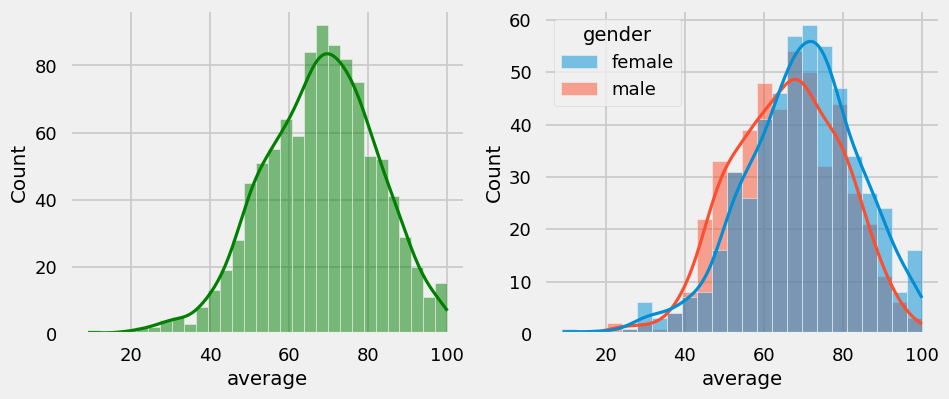

In [202]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

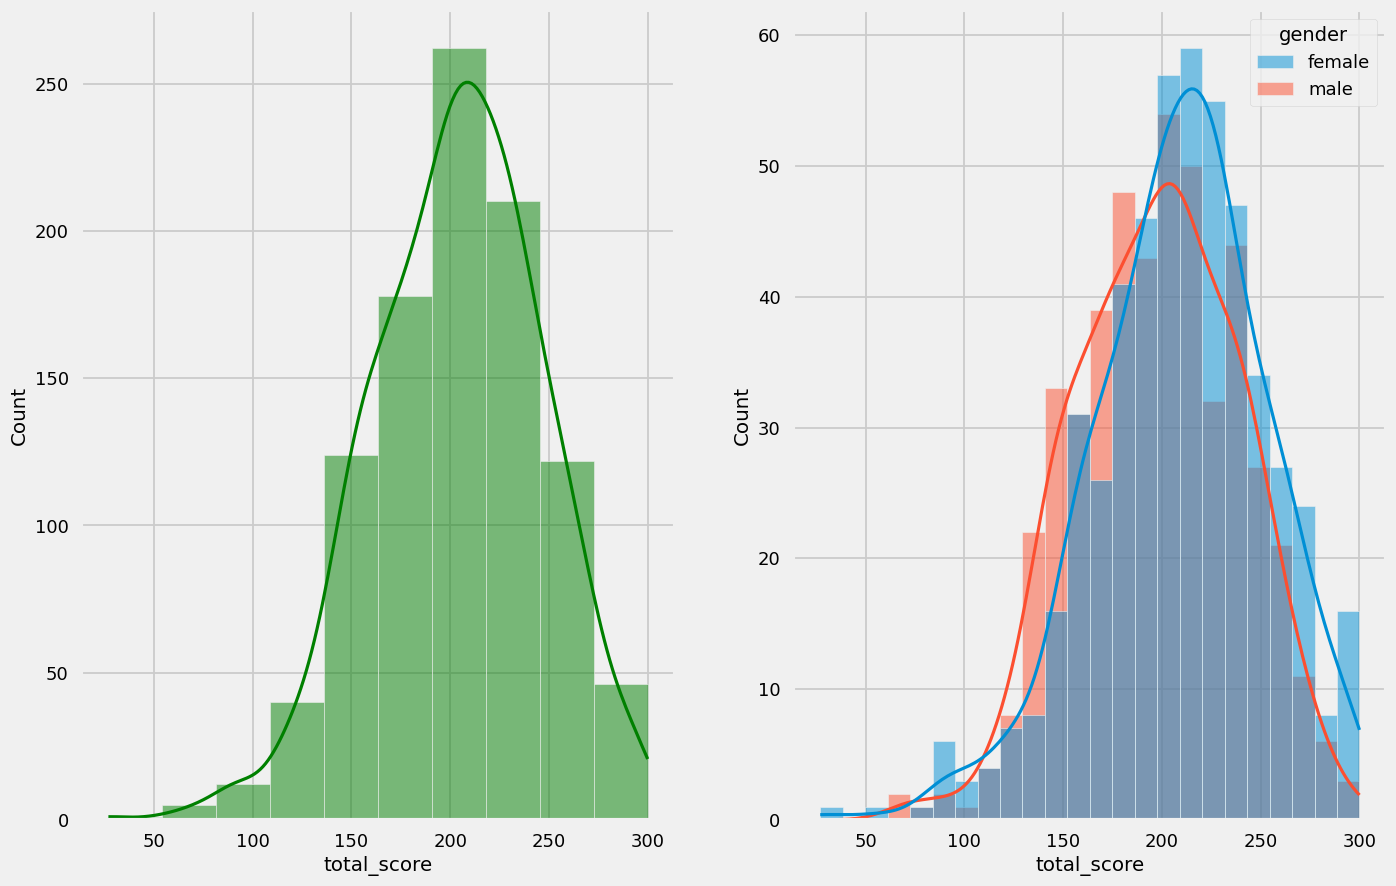

In [204]:
fig, axs = plt.subplots(1,2, figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=10, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

#### Insights 

- Female students tend to perform well than male students.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


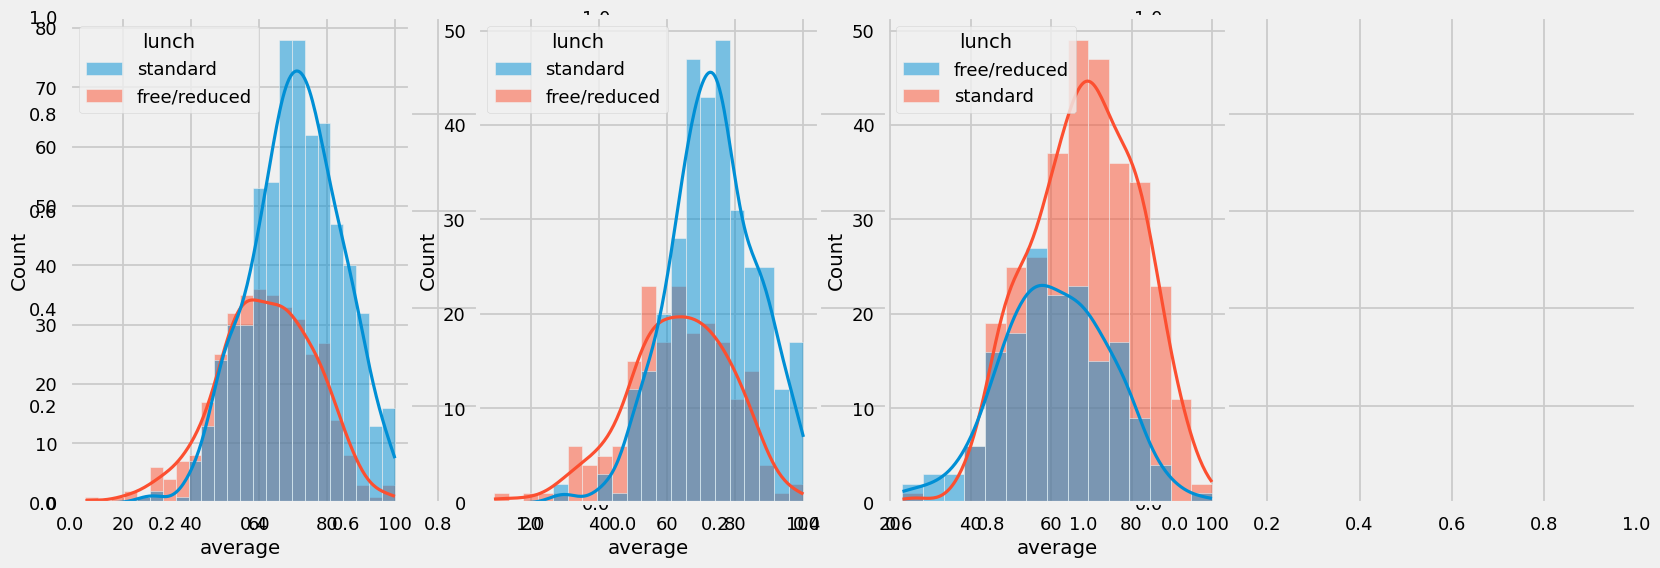

In [211]:
plt.subplots(1,3, figsize=(18,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [59]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

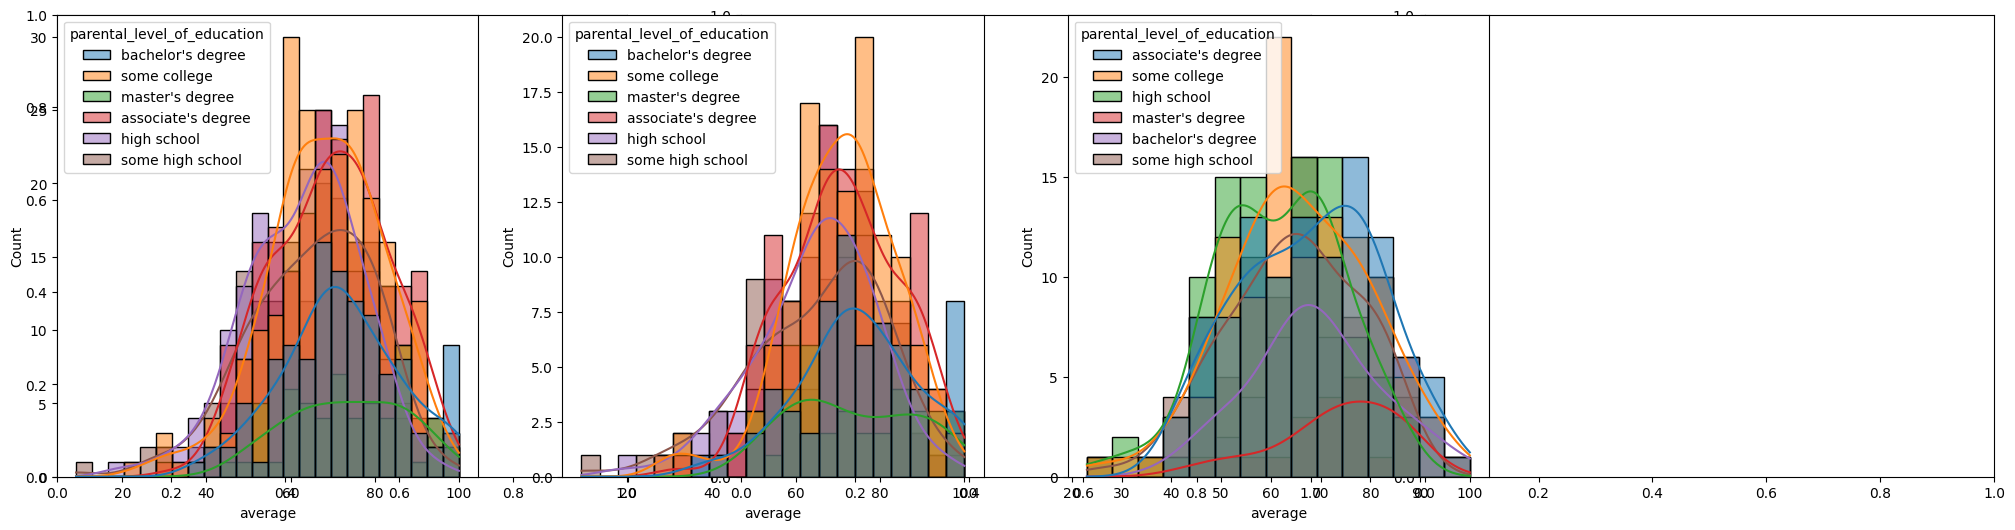

In [67]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
axs=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
axs=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
axs=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights

- In general parent's education don't help student perform well in exam.
- 2nd plot we can see there is no effect of parent's education on female student.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

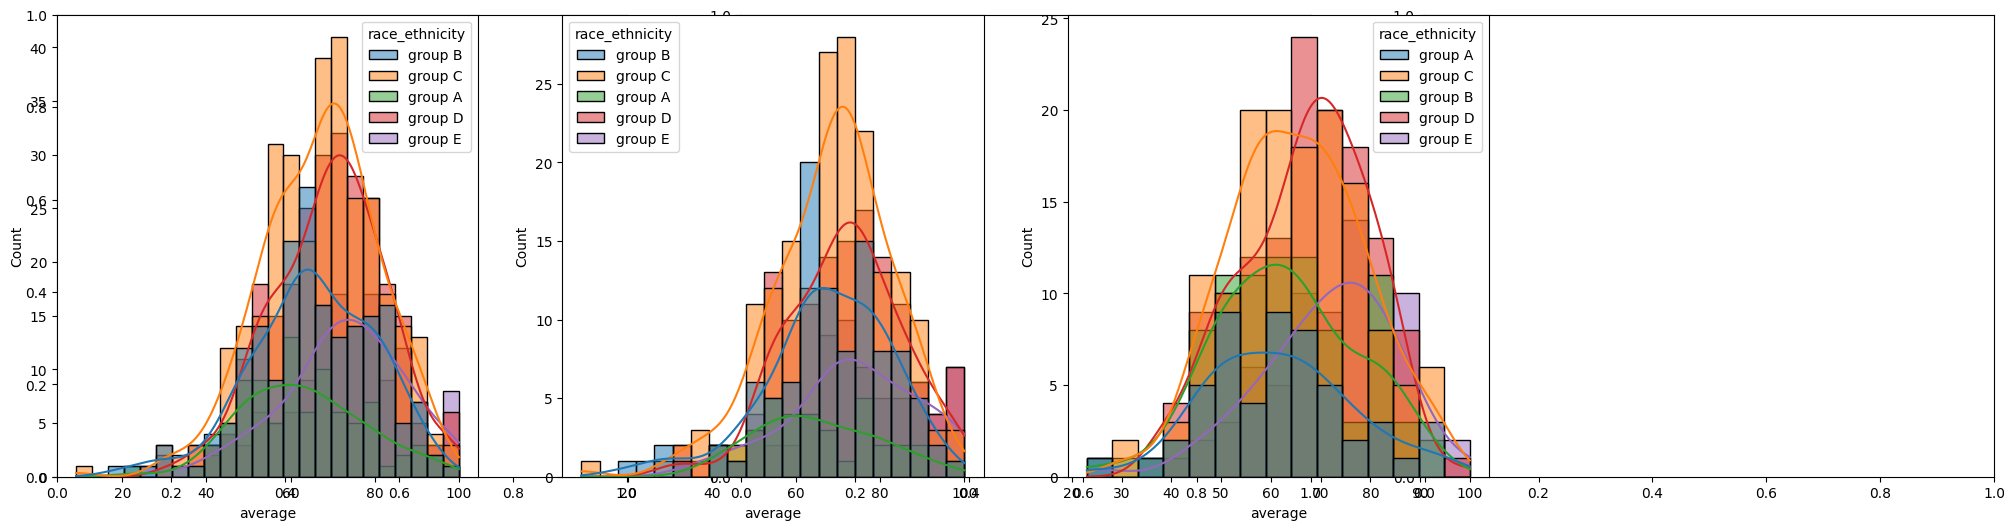

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

#### Insight

- Students of group A and group B tends to perform poorly exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or or female.

#### 4.2 Maximum score of students in all three subjects.

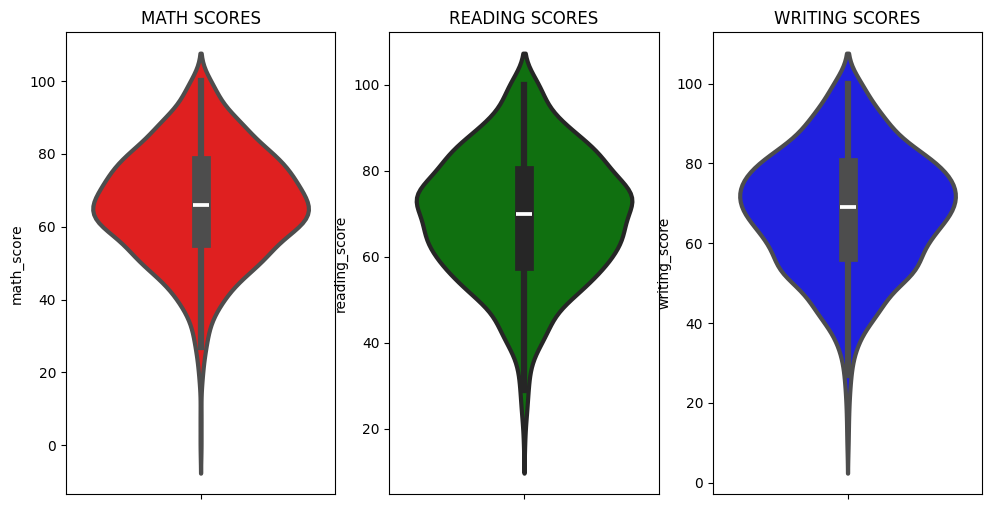

In [75]:
plt.figure(figsize=(16,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

#### Insight

- From above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

#### 4.3 Multivariate analysis using pieplot

In [78]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

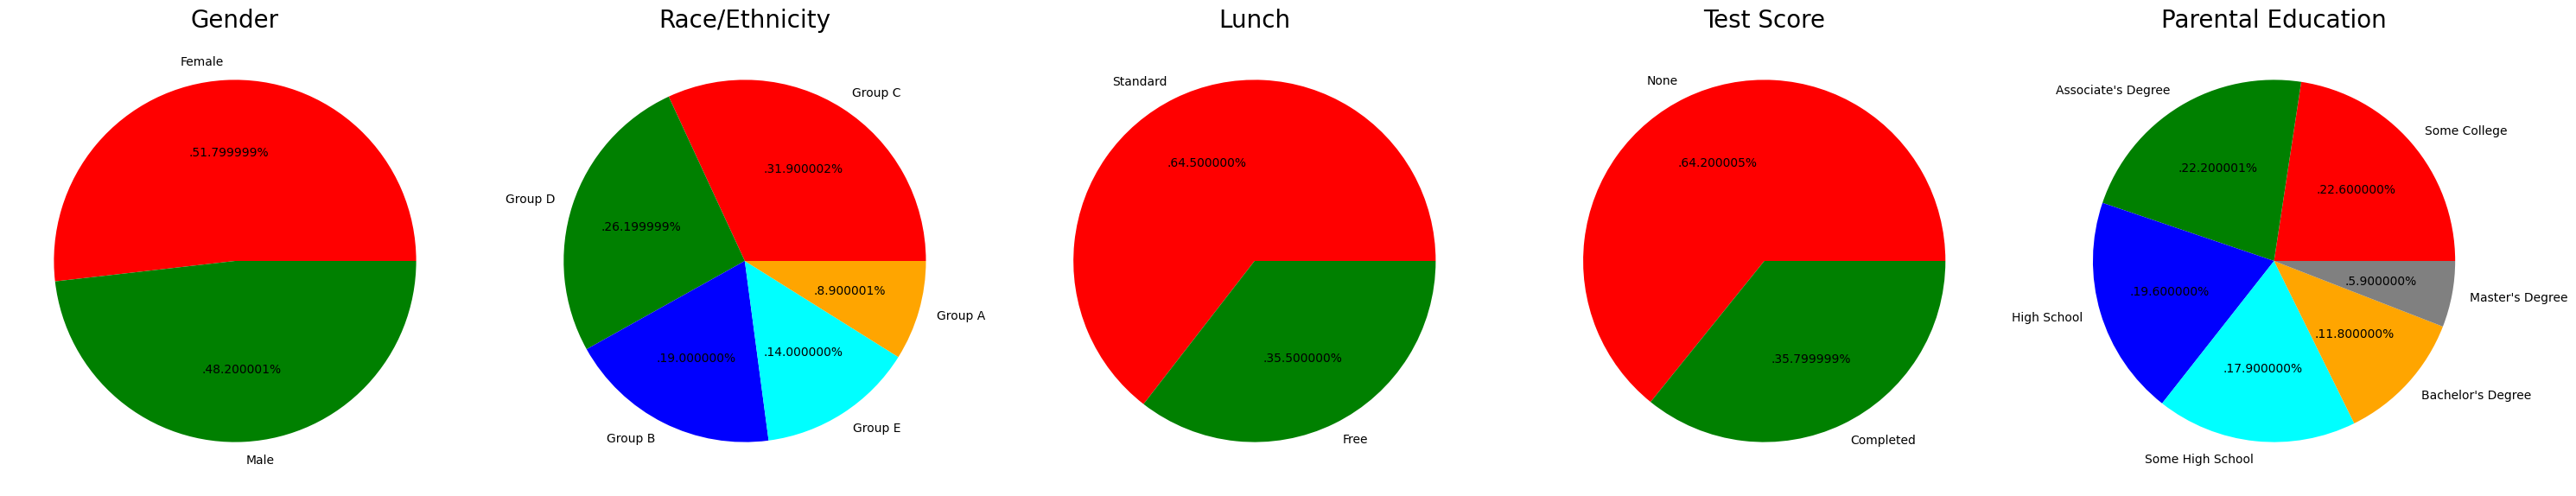

In [82]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.gca().axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.gca().axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.gca().axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Score', fontsize=20)
plt.gca().axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = "Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.gca().axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights

- Number of Male and Female students is almost equal.
- Number of students are greatest in Group C.
- Number of students who have standard lunch are greater.
- Number of students who have not enrolled in any test preparation couse is greater.
- Number of students wose parental education is "Some of College" is greater followed closely "Associate's Degree".

#### 4.4 Feature Wise Visualization.

##### 4.4.1 Gender Column

- How is distribution of Gender?
- Is gender has any impact on student's performance?

#### UNIVARIATE ANALYSIS (How is distribution of Gender?)

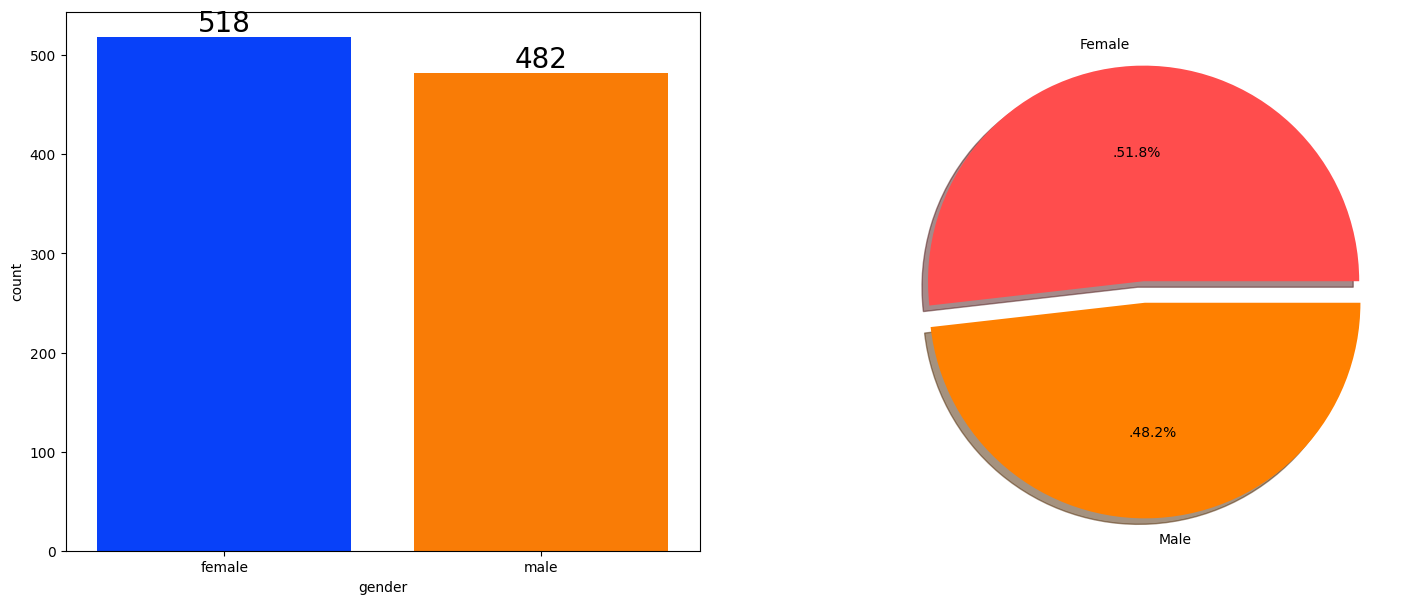

In [91]:
f, ax=plt.subplots(1,2, figsize=(18,7))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Female','Male'], explode=[0,0.1], autopct='.%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000']) 
plt.show()

#### Insights 

- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

In [92]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

#### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [127]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


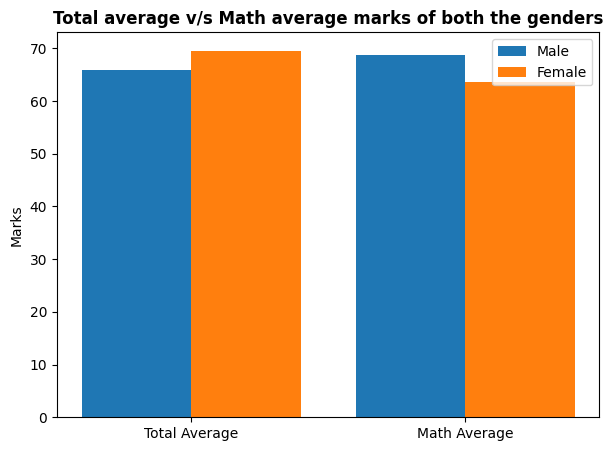

In [134]:
plt.figure(figsize=(7, 5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights 

- On a average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 Race/Enthnicity Column

- How is group wise distribution?
- Is Race/Ethnicity has any impact on students performance?

#### UNIVARIATE ANALYSIS (How is Group wise distribution?)

In [135]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

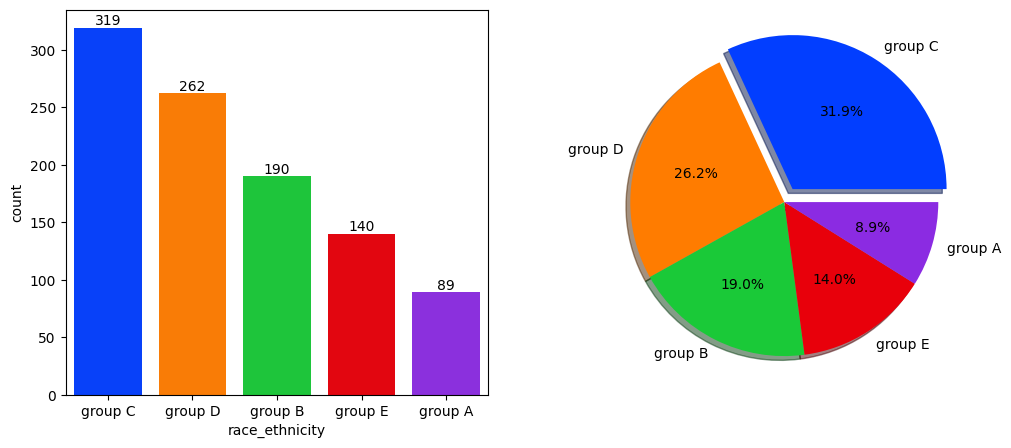

In [150]:
# Define an explicity order based on the freequency (or any desired order)
order = df['race_ethnicity'].value_counts().index.to_list()

# Dfine a consistent color palette with the same number of colors as categories.
colors = sns.color_palette("bright",len(order))

f, ax = plt.subplots(1,2, figsize=(12,5))

# Bar plot with explicit order and palette
sns.countplot(x=df['race_ethnicity'], data=df, order=order, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=10)

# Pie chart using the same order and colors
plt.pie(x=df['race_ethnicity'].value_counts().loc[order], labels=df['race_ethnicity'].value_counts().loc[order].index, 
        colors=colors, explode=[0.1,0,0,0,0], 
        autopct='%1.1f%%', shadow=True)
plt.show()

#### Insights

- Most of the student belonging from Group C / Group D.
- Lowest number of students belong to Group A.

#### BIVARIATE ANALYSIS (Is Race/Ethnicity has any impact of students performance?)

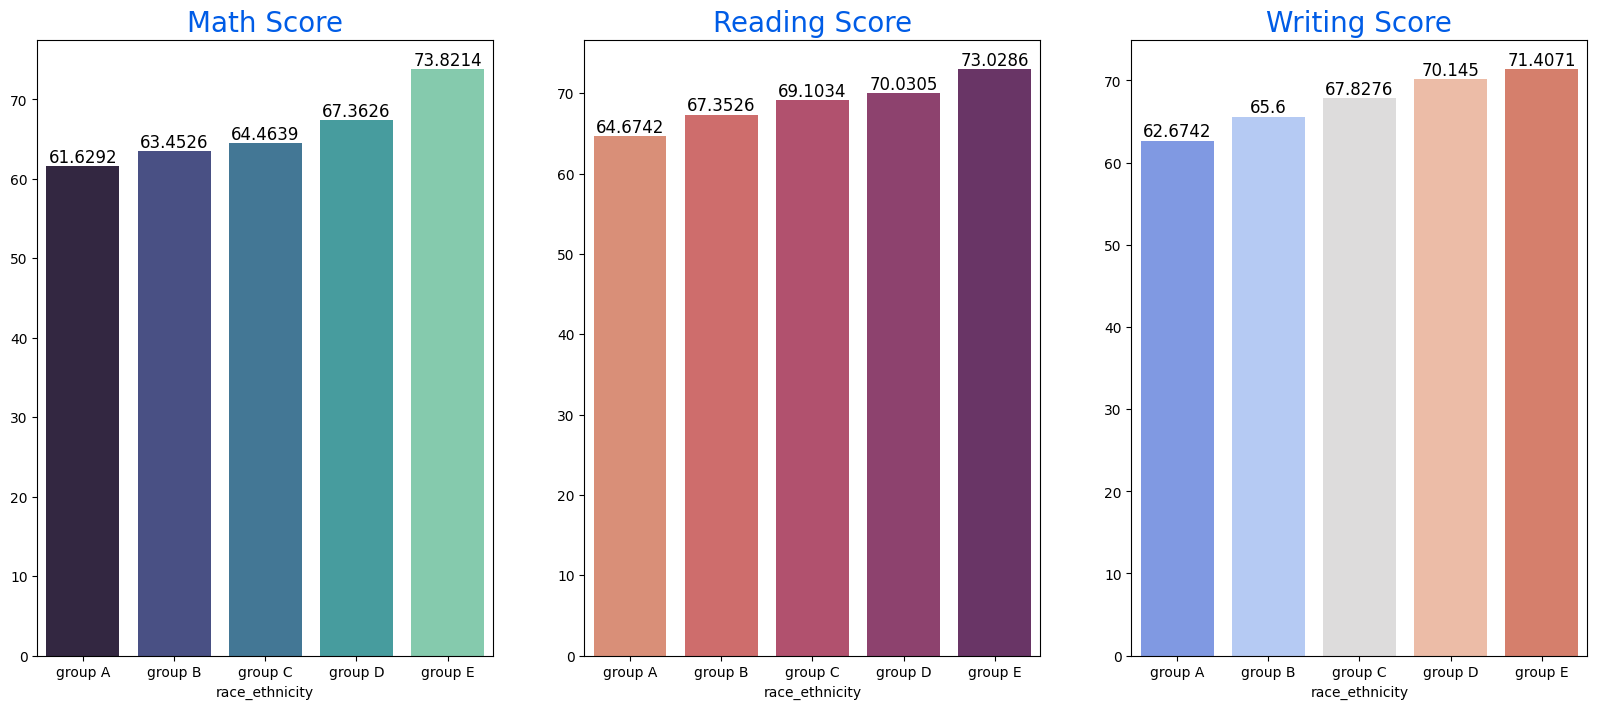

In [156]:
Group_data2 = df.groupby('race_ethnicity')
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean(numeric_only=True).index, 
            y=Group_data2['math_score'].mean(numeric_only=True).values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

sns.barplot(x=Group_data2['reading_score'].mean(numeric_only=True).index,
            y=Group_data2['reading_score'].mean(numeric_only=True).values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

sns.barplot(x=Group_data2['writing_score'].mean(numeric_only=True).index,
            y=Group_data2['writing_score'].mean(numeric_only=True).values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black', size=12)

#### Insights

- Group E students have scored the highest marks
- Group A students have scored the lowest marks
- Students from a lower Socloeconomic status have a lower avg in all course subjects

#### 4.4.3 Parental Level of Education Column

- What is educational background of students parent?
- Is parental education has any impact on student's performance?

#### UNIVARIATE ANALYSIS (What is educational background of student parent?)

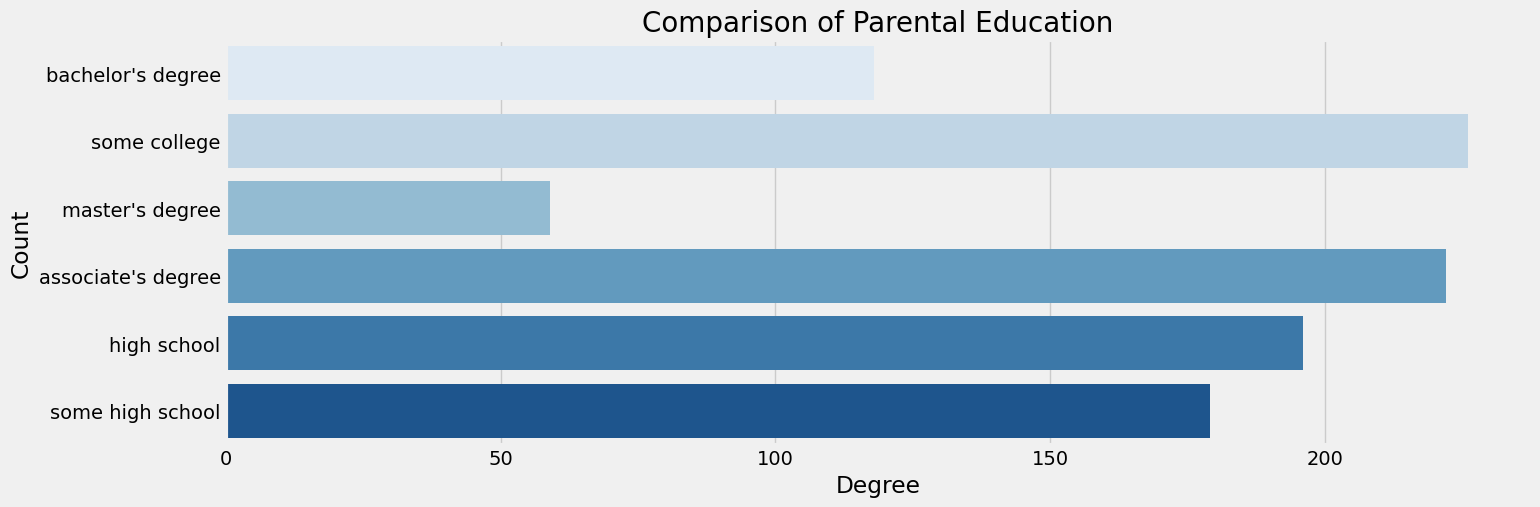

In [161]:
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

##### Insights

- Largest number of parents are form some college.

#### BIVARIATE ANALYSIS (Is parental education has any impact on students performance?)

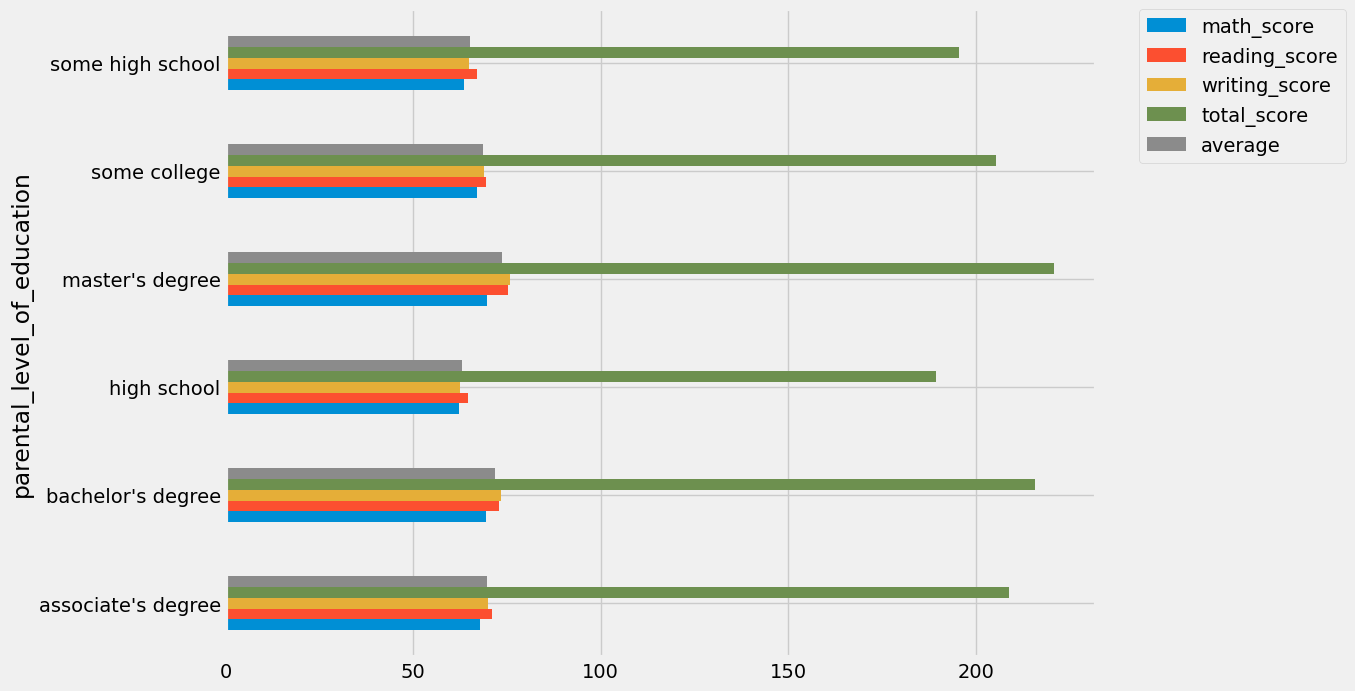

In [167]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=[10,8])
plt.legend(bbox_to_anchor=[1.05,1], loc=2, borderaxespad=0.)
plt.show()

##### Insights

- The score of student whose parents possess master and bachelor level education are higher than others

#### 4.4.4 Lunch Column

- Which type of lunch is most common amoung students?
- What is the effect of luch type on test results?

#### UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students?)

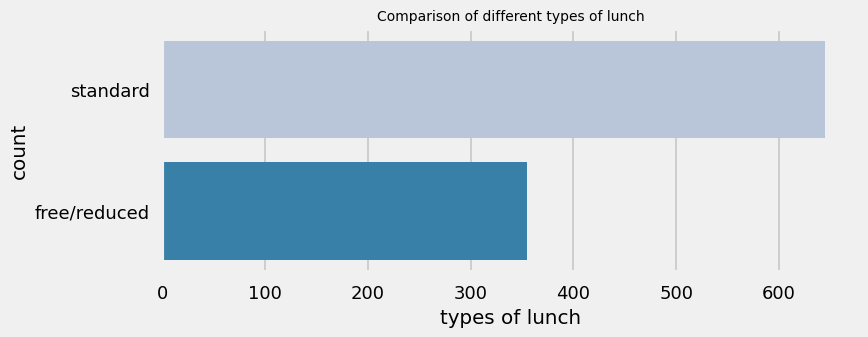

In [183]:
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['figure.figsize']=(8,3)
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=10, fontsize=10)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### Insights

- Students being served Standard lunch was more than free lunch

#### 4.4.5 Test Preparation Course

- Which type of lunch most common amoung students?
- Is Test preparation course has any impact on student's performance?

#### BIVARIATE ANALYSIS (Is Test preparation course any impact student's performance?)

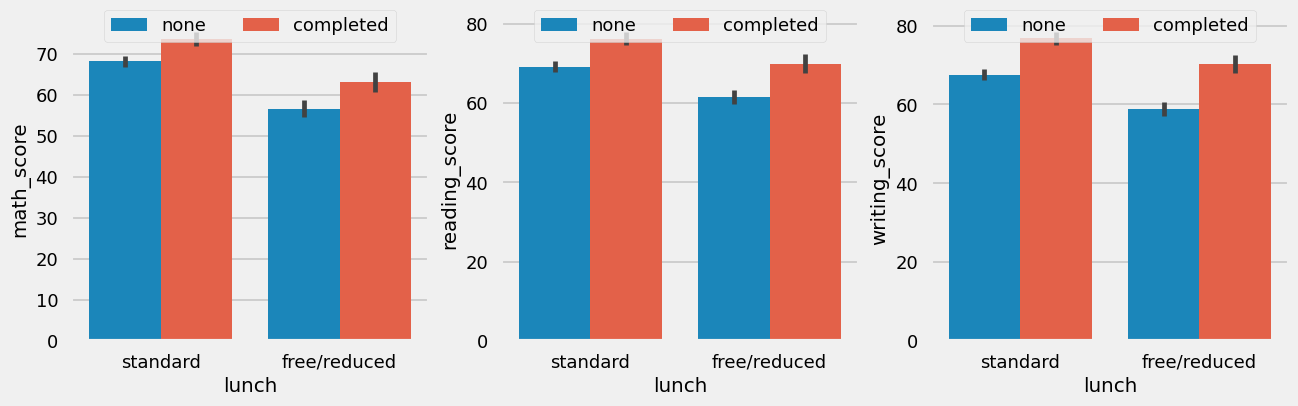

In [191]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.subplot(1,3,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.subplot(1,3,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.show()

##### Insights

- Students who have completed the Test preparation course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

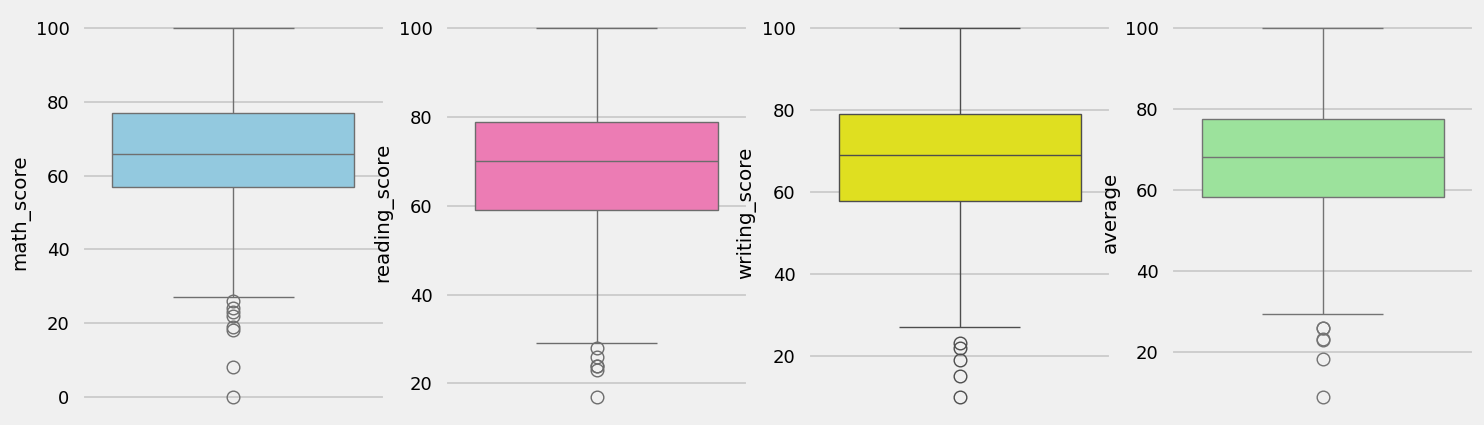

In [196]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

<Figure size 1000x400 with 0 Axes>

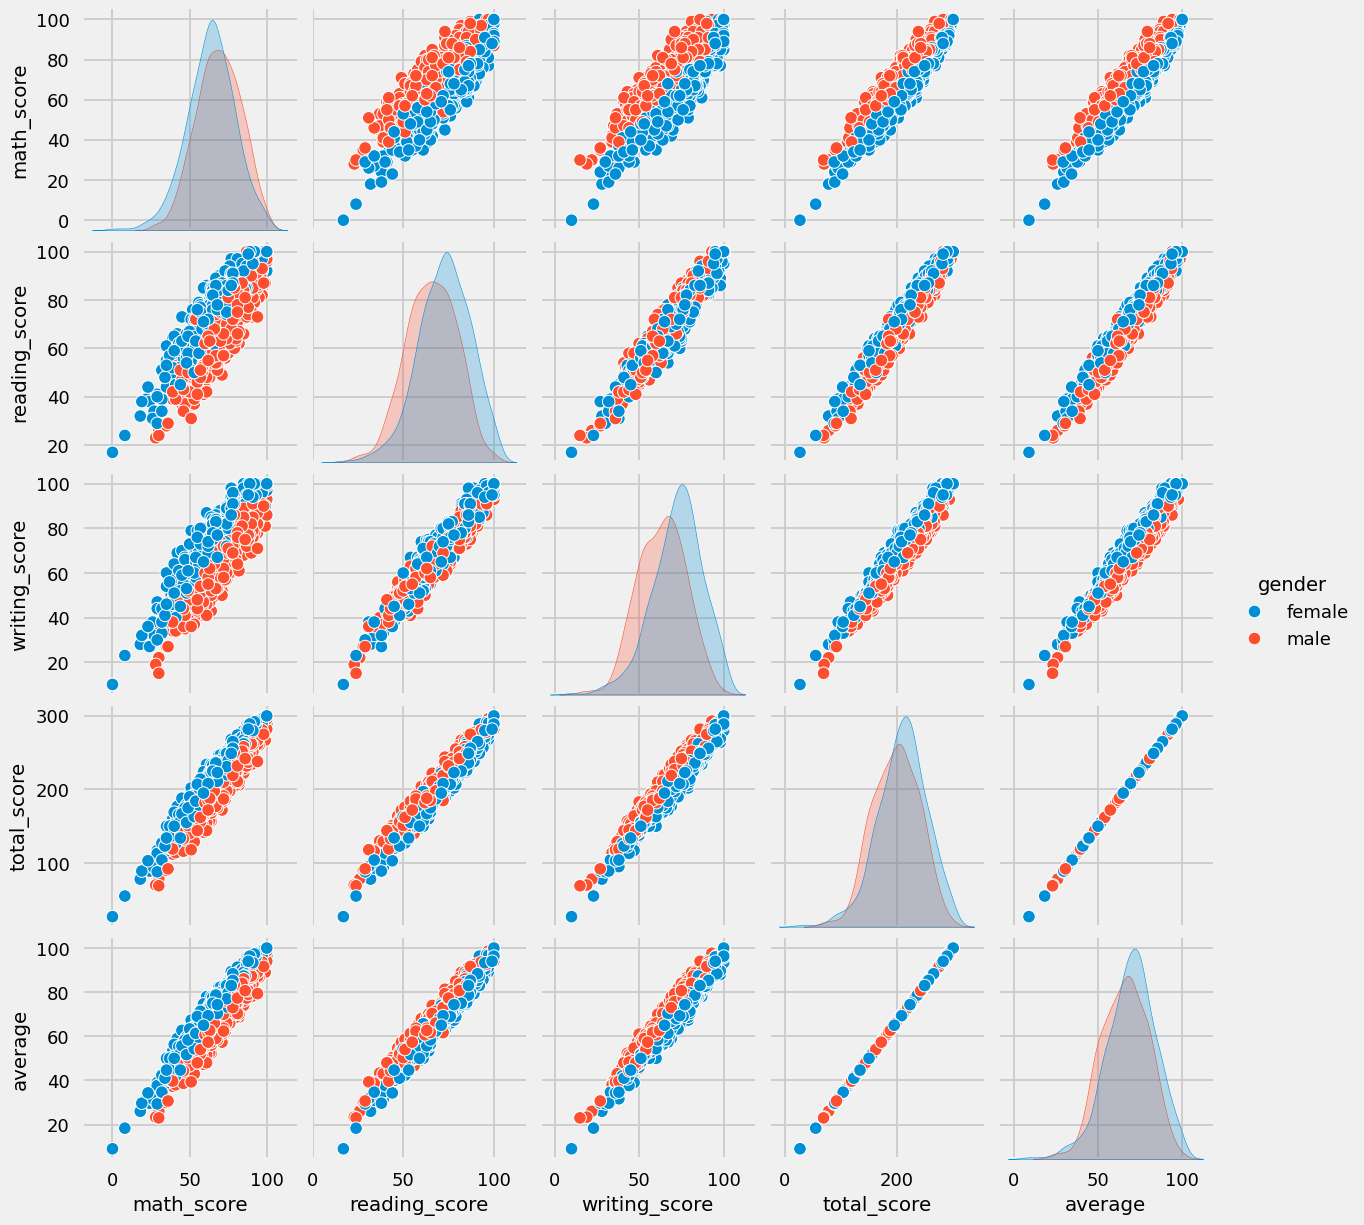

In [200]:
plt.figure(figsize=(10,4))
sns.pairplot(df, hue='gender')
plt.show()

#### Insights

- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusion

- Students Performance is realted with lunch, race, parental level education
- Females lead in pass percentage and also ate top-scorers
- Students Performance is not much realted with test preparation course
- Finishing preparation course is benefitial